In [3]:
#Libraries to be imported in this report

import sys
import math
import numpy as np
import pygame
import scipy.signal
import matplotlib.pylab as plt
import matplotlib.animation
from matplotlib import pyplot as plt
from matplotlib import animation
import IPython.display
import time
%matplotlib inline
from math import floor

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


pygame 2.3.0 (SDL 2.24.2, Python 3.9.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Section 1: Wolfram Elementary CA Implementation

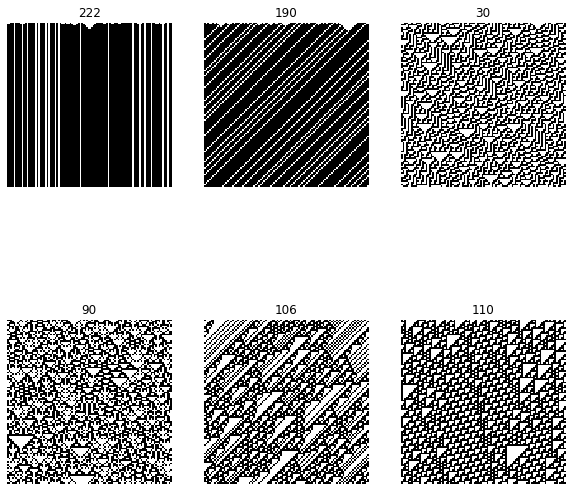

In [8]:
#Code is modified from the a blog site https://blog.scientific-python.org/matplotlib/elementary-cellular-automata/
#to show different plots into 1 figure,
#of what the 4 categories, uniformity, repetition, randomness and complexity mean visually.
#Please feel free to make changes to the rule sets to show other different results in this report.

g = np.array([[4], [2], [1]]) #Defines the vector to obtain numbers written in binary form

def step(x, rule_b):
    """This function computes a single given state of an elementary cellular
    automaton."""
    # Columns contain the L, C, R values of all cells
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    # Obtain the LCR pattern numbers between 0 and 7.
    z = np.sum(y * g, axis=0).astype(np.int8)
    # Obtain patterns given by the rule.
    return rule_b[7 - z]

def generate(rule, size=100, steps=100):
    """Simulates an elementary cellular automaton given
    its rule (number between 0 and 255 for a total of 256 rules)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Initialise a random initial state.
    x[0, :] = np.random.rand(size) < .5
    # Apply the iterative step function.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

#Produce the Plots:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
rules = [222, 190, 30,
         90, 106, 110,] #Rule set numbers can be changed here. See Wolfram Elementary CA hyperlink
#for Rule numbers to see which particular 2D result of interest
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))



### Section 2: Conway's Game of Life Implementation using 2D Array Grid Counting 

In [7]:
#This code, in particular, the simulate function I have written is inspired from 
#https://beltoforion.de/en/recreational_mathematics/game_of_life.php reference.
#pygame library is 

#Set up the environment space using R, G, B channels for grid, background and states (0 and 1)
#Define basic colors since colors will be re-used often so defining color constants of the environment are used.
color_background = (255, 255, 255) #white
color_grid = (40, 40, 40) #Dark grey lines around the grid squares
color_future_death = (180, 180, 180) #light grey to signal imminent death
color_future_alive = (0, 0, 0) #Pure black means alive

"""The core defining function that Governs Conway's Game of Life """
def simulate(screen, cells, size, with_progress=False):
    updated_cells = np.zeros((cells.shape[0], cells.shape[1])) #creates an empty array of cells

    for row, col in np.ndindex(cells.shape):
        alive = np.sum(cells[row-1:row+2, col-1:col+2]) - cells[row, col] #Counts the cell in Moore's Neighborhood
        color = color_background if cells[row, col] == 0 else color_future_alive #color default settings

        #Rules of Conway's Game of Life
        if cells[row, col] == 1:
            if alive < 2 or alive > 3:
                if with_progress:
                    color = color_future_death
            elif 2 <= alive <= 3:
                updated_cells[row, col] = 1
                if with_progress:
                    color = color_future_alive
        else:
            if alive == 3:
                updated_cells[row, col] = 1
                if with_progress:
                    color = color_future_alive

        pygame.draw.rect(screen, color, (col*size, row*size, size - 1, size - 1)) 

    return updated_cells

"""Pygame function that set ups a separate command window for pattern; documentation is in pygame hyperlink"""
def main():
    #pygame.init() 
    screen = pygame.display.set_mode((800, 600)) #creates the screen

    cells = np.zeros((60, 80))
    screen.fill(color_grid) #grid color on screen
    simulate(screen, cells, 10)

    pygame.display.flip()
    pygame.display.update()

    running = False

    #Looping of the game window
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE: #You can introduce living cells even as system is runninh
                                                #Meaning using your mouse click, can add more black grid cells
                    running = not running
                    simulate(screen, cells, 10)
                    pygame.display.update()
            if pygame.mouse.get_pressed()[0]:
                pos = pygame.mouse.get_pos() 
                cells[pos[1] // 10, pos[0] // 10] = 1
                simulate(screen, cells, 10)
                pygame.display.update()

        screen.fill(color_grid)

        if running:
            cells = simulate(screen, cells, 10, with_progress=True) 
            pygame.display.update()

        time.sleep(0.001) #Add delay in execution time (This will be useful in slowing down the transition)

main()

#NOTE: When you run this code, you need to first create your own initial pattern of living cells by 
#clicking any of the black grid cells, they will turn white to represent living cells initially.
#Once you are happy with the initial pattern, press "spacebar" key and let Conway's game of life algo run
#If you want to change the initial pattern, close the command window, re-run this section and repeat the steps
#If a separate window does not appear, it might be that your computer does not have pygame.

### Section 3: Implementation of Lenia Variation (Conway's Game of life in continuous space) 

Based on the research article on [Smoothlife][smooth].

[smooth]: https://arxiv.org/abs/1111.1567 

This segment below plots the Sigmoid function for explaining the details of the mathematics behind Smoothlife outlined in the report.

Text(0.5, 0, 'x')

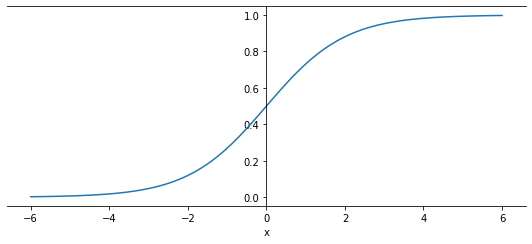

In [80]:
#Plotting the logistic sigmoid function in section 5.1.2 in the report
#as part of understanding the key maths in the algorithm.

fig = plt.figure()

def f(x):
   return 1/(1+np.exp(-(4/A)*(x-a)))

a=0
A=4 #A is alpha
x = np.linspace(-6, 6, 100)

ax = fig.add_subplot(111)
ax.plot(x, f(x))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('x')

#### Smoothlife Algorithm Implementation Begins here

Step 1: Defining the Logistic Sigmoid Functions and the range for the living state of the cells

In [ ]:
# Defining the logistic sigmoid function on x around x0 with transition width alpha 
# As explained in Rafler's paper: https://arxiv.org/pdf/1111.1567.pdf
def logistic_threshold(x, x0, alpha):
    return 1.0 / (1.0 + np.exp(-4.0 / alpha * (x - x0)))


def hard_threshold(x, x0):
    return np.greater(x, x0) #validates whether x > x0


def linearized_threshold(x, x0, alpha):
    #Threshold x around x0 with a linear transition region alpha
    return np.clip((x - x0) / alpha + 0.5, 0, 1)

Step 2: Building both the continuous and discretised set of the rules and generating a continuous domain for states

In [18]:
# Generalising the rules of game of life with the smooth, continuous values for the alive and dead states
""" x < a     : 0
    a < x < b : 1
    x > b     : 0 
    as explained in report for transition functions """
# Eqn.(4) implemented in code
def logistic_interval(x, a, b, alpha):
    return logistic_threshold(x, a, alpha) * (1.0 - logistic_threshold(x, b, alpha))

# Repeating the same procedure above but this time, using the linearised threshold
def linearized_interval(x, a, b, alpha):
    return linearized_threshold(x, a, alpha) * (1.0 - linearized_threshold(x, b, alpha))

# Interpolation from a to b with t ranging from 0 to 1
def lerp(a, b, t):
    return (1.0 - t) * a + t * b

class BasicRules:
    # Range of values where cells become alive (can change these values for diff patterns)
    B1 = 0.257
    B2 = 0.336

    # Stasis range (again, can change these values)
    D1 = 0.365
    D2 = 0.549

    # Widths of the sigmoids (Which can be adjusted)
    N = 0.028
    M = 0.147

    def __init__(self, **kwargs): #kwargs allow passing of a variable number of keyword arguments
        for k, v in kwargs.items():
            if hasattr(self, k):
                setattr(self, k, v)
            else:
                raise ValueError("Unexpected attribute %s" % k)

    def clear(self):
        pass

    def s(self, n, m, field):
        """This defines the state transition function"""
        # Convert the local cell average `m` to a metric of how alive the local cell is.
        # We transition around 0.5 as per report explanation (0 is fully dead and 1 is fully alive).
        # The transition width is defined by `self.M`
        aliveness = logistic_threshold(m, 0.5, self.M)
        # A fully dead cell will become alive if the neighbor density is between B1 and B2.
        # A fully alive cell will stay alive if the neighhbor density is between D1 and D2.
        # Interpolate between the two sets of thresholds depending on how alive/dead the cell is.
        threshold1 = lerp(self.B1, self.D1, aliveness)
        threshold2 = lerp(self.B2, self.D2, aliveness)
        # Now with the smoothness of `logistic_interval` determine if the neighbor density is
        # inside of the threshold to stay/become alive.
        new_aliveness = logistic_interval(n, threshold1, threshold2, self.N)

        return np.clip(new_aliveness, 0, 1)


class ExtensiveRules(BasicRules):

    sigmode = 0
    sigtype = 0
    mixtype = 0

    timestep_mode = 0
    dt = 0.3 #this timestep can be adjusted or played around as well for rendering animation

    # History for timestep_mode 5
    esses = [None] * 3
    esses_count = 0

    def sigmoid_ab(self, x, a, b):
        if self.sigtype == 0:
            return hard_threshold(x, a) * (1 - hard_threshold(x, b))
        elif self.sigtype == 1:
            return linearized_interval(x, a, b, self.N)
        elif self.sigtype == 4:
            return logistic_interval(x, a, b, self.N)
        else:
            raise NotImplementedError

    def sigmoid_mix(self, x, y, m):
        if self.mixtype == 0:
            intermediate = hard_threshold(m, 0.5)
        elif self.mixtype == 1:
            intermediate = linearized_threshold(m, 0.5, self.M)
        elif self.mixtype == 4:
            intermediate = logistic_threshold(m, 0.5, self.M)
        else:
            raise NotImplementedError
        return lerp(x, y, intermediate)

    def clear(self):
        self.esses = [None] * 3
        self.esses_count = 0

    def s(self, n, m, field):
        if self.sigmode == 1:
            b_thresh = self.sigmoid_ab(n, self.B1, self.B2)
            d_thresh = self.sigmoid_ab(n, self.D1, self.D2)
            transition = lerp(b_thresh, d_thresh, m)
        elif self.sigmode == 2:
            b_thresh = self.sigmoid_ab(n, self.B1, self.B2)
            d_thresh = self.sigmoid_ab(n, self.D1, self.D2)
            transition = self.sigmoid_mix(b_thresh, d_thresh, m)
        elif self.sigmode == 3:
            threshold1 = lerp(self.B1, self.D1, m)
            threshold2 = lerp(self.B2, self.D2, m)
            transition = self.sigmoid_ab(n, threshold1, threshold2)
        elif self.sigmode == 4:
            threshold1 = self.sigmoid_mix(self.B1, self.D1, m)
            threshold2 = self.sigmoid_mix(self.B2, self.D2, m)
            transition = self.sigmoid_ab(n, threshold1, threshold2)
        else:
            raise NotImplementedError

        if self.timestep_mode == 0:  # Discrete time step
            nextfield = transition

        # Or use a solution to the differential equation for the timestep in eqn(9)
        elif self.timestep_mode == 1:
            nextfield = field + self.dt * (2 * transition - 1)
        elif self.timestep_mode == 2:
            nextfield = field + self.dt * (transition - field)
        elif self.timestep_mode == 3:
            nextfield = m + self.dt * (2 * transition - 1)
        elif self.timestep_mode == 4:
            nextfield = m + self.dt * (transition - m)
        elif self.timestep_mode == 5:
            s0 = transition - m
            s1, s2, s3 = self.esses
            if self.esses_count == 0:
                delta = s0
            elif self.esses_count == 1:
                delta = (3 * s0 - s1) / 2
            elif self.esses_count == 2:
                delta = (23 * s0 - 16 * s1 + 5 * s2) / 12
            else:  # self.esses_count == 3:
                delta = (55 * s0 - 59 * s1 + 37 * s2 - 9 * s3) / 24
            self.esses = [s0] + self.esses[:-1]
            if self.esses_count < 3:
                self.esses_count += 1
            nextfield = field + self.dt * delta

        return np.clip(nextfield, 0, 1)


class SmoothTimestepRules(ExtensiveRules):
    # Regeneration Range (Can be adjusted)
    B1 = 0.305
    B2 = 0.443

    # Survival range (can be adjusted)
    D1 = 0.556
    D2 = 0.814

    sigmode = 2
    sigtype = 1
    mixtype = 0

    timestep_mode = 2


Step 3: Creating the Convolution Function and Kernel Multipliers

In [ ]:
def antialiased_circle(size, radius, roll=True, logres=None):
    """This  circle with blurred edges"""
    # Set roll=False to have the circle centered in the middle of the matrix. 
    # After experimentation, best to center at the extremes (ideal for convolution). (therefore: roll=True)
    # Maths of the convolution function can be found in: https://0fps.net/2012/11/19/conways-game-of-life-for-curved-surfaces-part-1/
    y, x = size
    # Obtains the coordinate values of each point
    yy, xx = np.mgrid[:y, :x]
    # Distance between each point and the center
    radiuses = np.sqrt((xx - x / 2) ** 2 + (yy - y / 2) ** 2)
    # Scale factor for the transition width
    if logres is None:
        logres = math.log(min(*size), 2)
    with np.errstate(over="ignore"):
        # With big radiuses, the exp overflows,
        # but 1 / (1 + infinity) = 0
        logistic = 1 / (1 + np.exp(logres * (radiuses - radius)))
    if roll:
        logistic = np.roll(logistic, y // 2, axis=0)
        logistic = np.roll(logistic, x // 2, axis=1)
    return logistic


class Multipliers:
    """Performing the Kernel Convolution for the M and N integrals"""

    INNER_RADIUS = 7.0
    OUTER_RADIUS = INNER_RADIUS * 3.0 #r_a = 3r_i as per report explanation

    def __init__(self, size, inner_radius=INNER_RADIUS, outer_radius=OUTER_RADIUS):
        inner = antialiased_circle(size, inner_radius)
        outer = antialiased_circle(size, outer_radius)
        annulus = outer - inner

        # Scale each kernel so the sum is 1
        inner /= np.sum(inner)
        annulus /= np.sum(annulus)

        # Precompute the FFT's
        self.M = np.fft.fft2(inner)
        self.N = np.fft.fft2(annulus)


class SmoothLife:
    def __init__(self, height, width):
        self.width = width
        self.height = height

        self.multipliers = Multipliers((height, width))

        self.rules = BasicRules() 
        """This portion can change the type of rules discretised or smooth"""
        #self.rules = SmoothTimestepRules()

        self.clear()

    def clear(self):
        """Zeroes out the field"""
        self.field = np.zeros((self.height, self.width))
        self.rules.clear()

    def step(self):
        """Perform the timestep and return field"""

        # To sum up neighbors, do kernel convolutions
        # by multiplying in the frequency domain
        # and converting back to spacial domain
        field_ = np.fft.fft2(self.field)
        M_buffer_ = field_ * self.multipliers.M
        N_buffer_ = field_ * self.multipliers.N
        M_buffer = np.real(np.fft.ifft2(M_buffer_))
        N_buffer = np.real(np.fft.ifft2(N_buffer_))

        # Apply transition rules
        self.field = self.rules.s(N_buffer, M_buffer, self.field)
        return self.field

#This function is to randomly add living cells in the form of squares to the grid field
    def add_speckles(self, count=None, intensity=1):
        """If count unspecified, it will perform a moderately dense fill.
        """
        if count is None:
            count = int(
                self.width * self.height / ((self.multipliers.OUTER_RADIUS * 2) ** 2)
            )
        for i in range(count):
            radius = int(self.multipliers.OUTER_RADIUS)
            r = np.random.randint(0, self.height - radius)
            c = np.random.randint(0, self.width - radius)
            self.field[r : r + radius, c : c + radius] = intensity


Step 4: Rendering the animation

In [ ]:
def show_animation():
    w = 1 << 9
    h = 1 << 9
    # w = 1920
    # h = 1080
    sl = SmoothLife(h, w)
    sl.add_speckles()
    sl.step()

    fig = plt.figure()
    # There are different color maps: viridis, plasma, gray, binary, seismic, gnuplot
    im = plt.imshow(
        sl.field, animated=True, cmap=plt.get_cmap("seismic"), aspect="equal"
    )

    def animate(*args):
        im.set_array(sl.step())
        return (im,)

    ani = animation.FuncAnimation(fig, animate, interval=60, blit=True)
    plt.show()


def save_animation():
    w = 2 << 8
    h = 2 << 8
    # w = 1920
    # h = 1080
    sl = SmoothLife(h, w)
    sl.add_speckles(count=50)

    # Will need to install scikit-video module for animation save to work if not done so for the reader
    # which provides better quality video processing in python than matplotlib.

    from skvideo.io import FFmpegWriter
    from matplotlib import cm

    fps = 10
    frames = 100 #length of the video which can be adjusted, the glider pattern was the first pattern with 100 frames
    w = FFmpegWriter("test.mp4", inputdict={"-r": str(fps)})
    for i in range(frames):
        frame = cm.seismic(sl.field)
        frame *= 255
        frame = frame.astype("uint8")
        w.writeFrame(frame)
        sl.step()
    w.close()


save_animation()

### Section 4: Implementation of Gray Scott Model

Based on the research article on 


Step 1: Setting up the PyGame Screen Settings

In [59]:
# Screen Settings in PyGame
width = 300
height = 300
screen_size = (width, height)

Step 2: Laplacian Differential Equations

In [62]:
"""NOTE: You will need to re-run this part if you want to reset the simulation from beginning
 before running the 3rd step for PyGame simulation"""

"""Setting up the Grid to store the concentration of the chemicals in each pixel"""

# Creates the seed size
seed_size = 20

#Storing the numbers for chemical concentration
grid = np.zeros((width, height, 2), dtype=np.float32)

grid[0:width, 0:height] = [1, 0]

w1 = math.floor(width / 2 - seed_size / 2)
w2 = math.floor(width / 2 + seed_size / 2)
h1 = math.floor(height / 2 - seed_size / 2)
h2 = math.floor(height / 2 + seed_size / 2)
grid[w1:w2, h1:h2] = [0, 1]

"""Convolution of the Laplacian Operator and initialising the Laplacian Differential Equations"""

def laplace2D(grid):
    # We use the convolution matrix for the laplacian operator
    laplace = np.array([[0.05, 0.2, 0.05],
                        [0.2, -1, 0.2],
                        [0.05, 0.2, 0.05]])
    view = np.lib.stride_tricks.sliding_window_view(grid, (3, 3))
    #With the specified window shape, creates a rolling view within the array.

    #Extracting subsets of the array at all window points while sliding across all array dimensions.
    result = np.sum(view * laplace, axis=(-1, -2))
    result = np.pad(result, pad_width=1)

    return result


def constrain(value, min_limit, max_limit):
    return np.minimum(max_limit, np.maximum(min_limit, value))


def update(c_grid):
    f = 0.018  # This is the feed Rate
    k = 0.051  # This is the kill Rate
    dt = 1  # time step

    u = c_grid[:, :, 0]
    v = c_grid[:, :, 1]
    D_u = 1.0 #Diffusion Coefficient u
    D_v = 0.5 #Diffusion Coefficient v
    U = constrain(u + (D_u * laplace2D(u) - u * v * v + f * (1 - u)) * dt, 0, 1)
    V = constrain(v + (D_v * laplace2D(v) + u * v * v - (k + f) * v) * dt, 0, 1)
    R = np.dstack([U, V]) #Stack the arrays in sequence depth wise (along third axis)
    return R

#Produces Visible colors for the Grid
def get_color(grid):
    c_arr = np.zeros((width, height, 3), dtype=np.uint8)

    #Set to blue color, can change to other colors as well
    c = np.floor((grid[:, :, 0] - grid[:, :, 1]) * 255) 
    c_arr[:, :, 0] = constrain(255 - c, 0, 0)
    c_arr[:, :, 1] = constrain(55 - c, 0, 150)
    c_arr[:, :, 2] = constrain(155 - c, 0, 255) #Make the background black
    return c_arr

Step 3: Run the PyGame Simulation

In [63]:
#Setting up the Simulation Settings

screen = pygame.display.set_mode(screen_size)
pygame.display.set_caption("Reaction - Diffusion")
clock = pygame.time.Clock()

# Main loop
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()

    grid = update(grid) 
    canvas = get_color(grid) 
    display_surf = pygame.surfarray.make_surface(canvas)

    screen.blit(display_surf, (0, 0))
    pygame.display.flip()
    clock.tick()

error: display Surface quit